In [1]:
import numpy as np
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from collections import defaultdict


## Dataset
[Insert the description of the dataset]

In [2]:
#[Inser the code here]
#Example
# Dataset: Highest grossing movies for the weekend of December 22-24, 2017.

df_le = pd.read_csv('netflix_titles.csv')
df_le.head(10)




,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


## Question 1

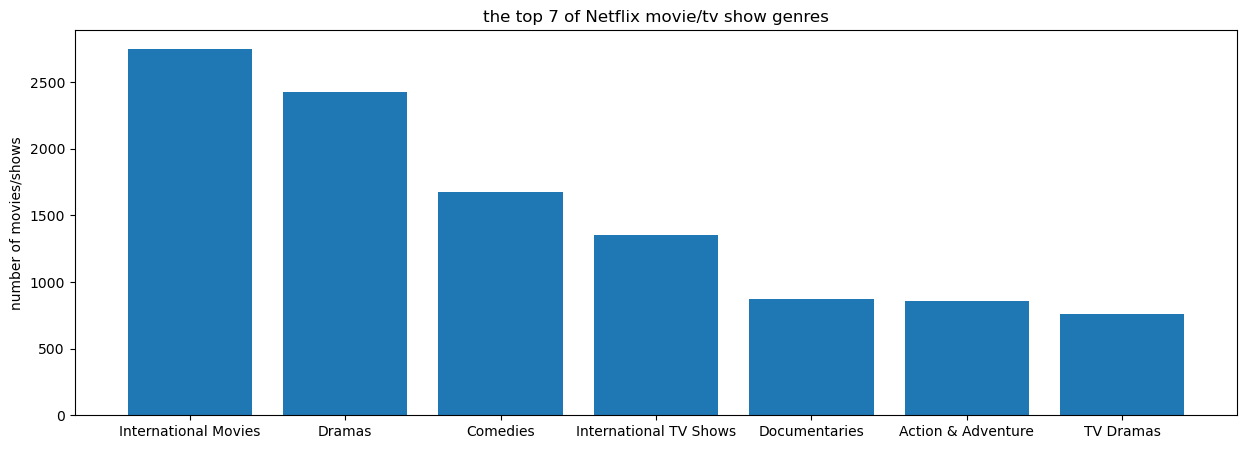

In [136]:
genre_dic = defaultdict(int)
total = 0
for i in df_le["listed_in"]:
    temp = i.split(",")
    for j in temp:
        j = j.lstrip(" ")
#         print(j)
        genre_dic[j] += 1
        total += 1


keys = []
values = []
reverted = {}

for k,v in genre_dic.items():
#     keys.append(k)
    values.append(v)
    reverted[v] = k

values = sorted(values,reverse=True)
values = values[:7]

# print(values)
for i in values:
    keys.append(reverted[i])
# print(keys)
    
# print("-------------------------------------------")
# print("the top 7 of Netflix movie/tv show genres")
# for i,j in zip(keys,values):
#     print(i,j)
fig, ax = plt.subplots(figsize=(15, 5)) # A figure (size width = 15, height=5) with a single Axes.
# ax.set_title('the top 7 of Netflix movie/tv show genres', loc='center', fontsize=24,x=-0.29,  y=1.05)
ax.bar(keys, values) # Creating a simple bar chart, in case of weeken gross I divided all values by 1M. 
ax.set_ylabel("number of movies/shows") # labeling the y-axis.
ax.set_title("the top 7 of Netflix movie/tv show genres")

plt.show() # Show graphic

## Question 2

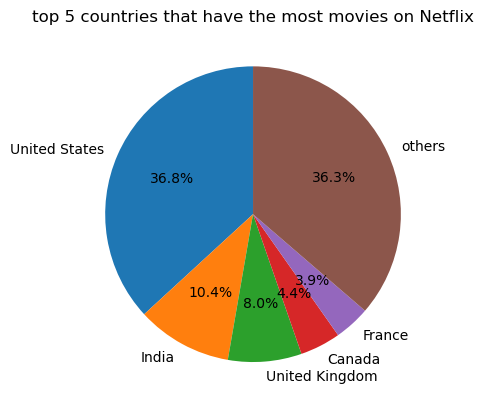

In [139]:
c_dic = defaultdict(int)
reverse = {}
total = 0
for i in df_le["country"]:
    if type(i) ==str:
        temp = i.split(",")
        for j in temp:
            j = j.lstrip(" ").rstrip(" ")
    #         print(j)
            c_dic[j] += 1
            total += 1

for k,v in c_dic.items():
    reverse[v] = k
#     print(v,k)



keys=[]
values = sorted(c_dic.values(),reverse=True)
# print(values)

total = 0
idx = 0
while idx < len(values):
    if idx >= 5:
        total += values[idx]
    idx += 1
values = values[:5]

for i in values:
    keys.append(reverse[i])
values.append(total)
keys.append("others")
    
# print(values)
# print(keys)

# for i,j in c_dic.items():
#     print(i,j)
    
# print("-------------------------------------------")
    
y = np.array(values)
mylabels = keys

plt.pie(y, labels = mylabels, startangle = 90, autopct='%1.1f%%')
plt.title("top 5 countries that have the most movies on Netflix")
plt.show() 

## Question 3

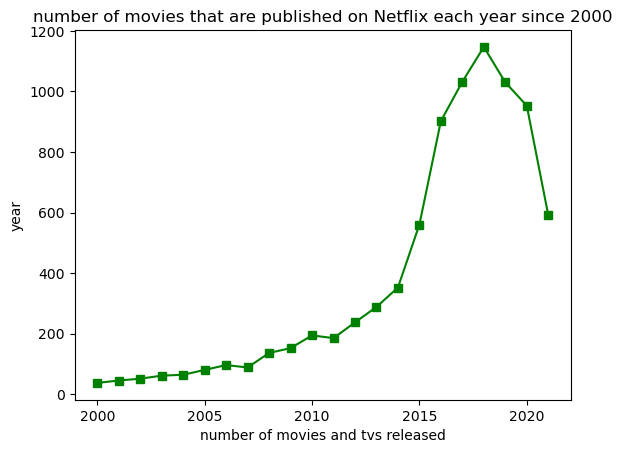

In [140]:
year_dic = defaultdict(int)

for i in df_le["release_year"]:
    if i >= 2000:
        year_dic[i] += 1
    
# for i,j in year_dic.items():
#     print(i,j)
    
    
# print("----------------------")
keys = sorted([k for k in year_dic.keys()])
values = []

for k in keys:
    values.append(year_dic[k])

# print(keys)
# print(values)


#折线图
x = keys#点的横坐标
k1 = values#线1的纵坐标
plt.plot(x,k1,'s-',color = 'g')#s-:方形

plt.xlabel("number of movies and tvs released")#横坐标名字
plt.ylabel("year")#纵坐标名字
plt.title("number of movies and tvs that are published on Netflix each year since 2000")
plt.show()
    

## Question 4

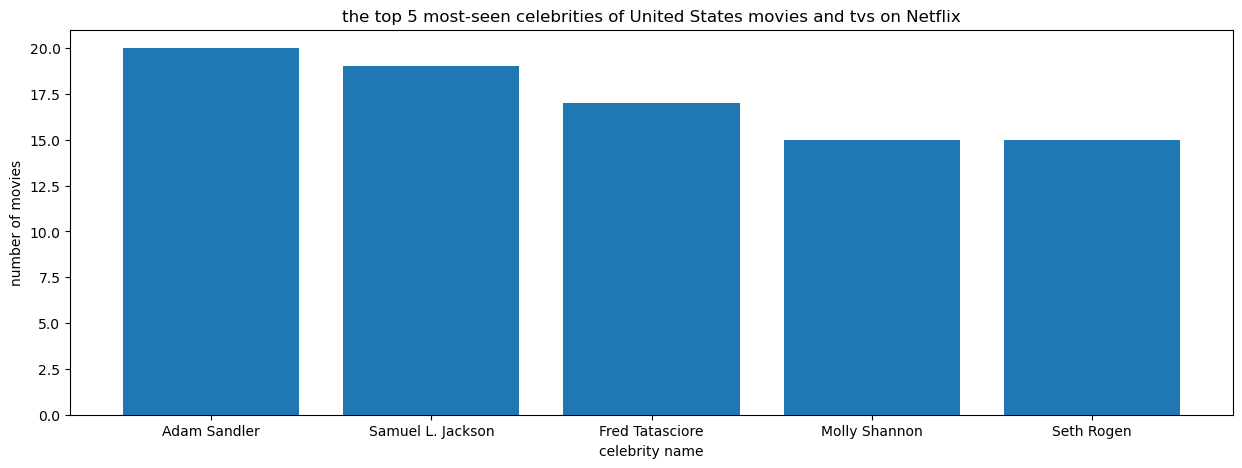

In [143]:
USdata = df_le[(df_le["country"]=="United States")]

celedict = defaultdict(int)
for i in USdata["cast"]:
    if type(i) == str:
        i = i.split(",")
        for j in i:
            temp = j.rstrip(" ").lstrip(" ")
            celedict[temp] += 1
            

keys=[]
values = []

for i,j in celedict.items():
    if j>=15:
        keys.append(i)
        values.append(j)

# print(keys,values)

tk = keys[1]
tv = values[1]

keys[1] = keys[2]
values[1] = values[2]

keys[2] = tk
values[2] = tv

fig, ax = plt.subplots(figsize=(15, 5)) # A figure (size width = 15, height=5) with a single Axes.
ax.bar(keys, values) # Creating a simple bar chart, in case of weeken gross I divided all values by 1M. 
ax.set_ylabel("number of movies") # labeling the y-axis.
ax.set_xlabel("celebrity name") # labeling the y-axis.
ax.set_title("the top 5 most-seen celebrities of United States movies and tvs on Netflix")
plt.show() # Show graphic

    

## Question 5

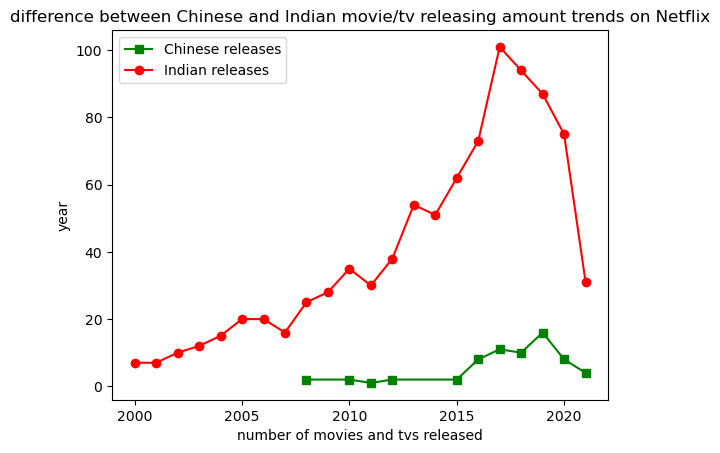

In [153]:
cndata = df_le[(df_le["country"]=="China")]
jpdata = df_le[(df_le["country"]=="India")]

year_dic = defaultdict(int)

for i in cndata["release_year"]:
    if i >= 2000:
        year_dic[i] += 1
    
# for i,j in year_dic.items():
#     print(i,j)
    
    
# print("----------------------")
keys = sorted([k for k in year_dic.keys()])
values = []

for k in keys:
    values.append(year_dic[k])

# print(keys)
# print(values)
#-------------------------------------------------------------------
year_dic1 = defaultdict(int)

for i in jpdata["release_year"]:
    if i >= 2000:
        year_dic1[i] += 1
    
# for i,j in year_dic.items():
#     print(i,j)
    
    
# print("----------------------")
keysi = sorted([k for k in year_dic1.keys()])
valuesi = []

for k in keysi:
    valuesi.append(year_dic1[k])
    
    
#折线图
x = keys#点的横坐标
k1 = values#线1的纵坐标
plt.plot(x,k1,'s-',color = 'g', label="Chinese releases")#s-:方形

x1 = keysi#点的横坐标
k11 = valuesi#线1的纵坐标
plt.plot(x1,k11,'o-',color = 'r',label="Indian releases")#s-:方形

plt.xlabel("number of movies and tvs released")#横坐标名字
plt.ylabel("year")#纵坐标名字
plt.title("difference between Chinese and Indian movie/tv releasing amount trends on Netflix")
plt.legend(loc = "best")#图例
plt.show()

    

## Question 6

PG-13 490
TV-MA 3207
PG 287
TV-14 2160
TV-PG 863
TV-Y 307
TV-Y7 334
R 799
TV-G 220
G 41
NC-17 3
NR 80
TV-Y7-FV 6
UR 3
{'R', 'UR', 'NR', 'NC-17', 'TV-Y7', 'PG-13', 'G', 'TV-Y7-FV', 'TV-Y', 'TV-MA', 'PG', 'TV-14', 'TV-G', 'TV-PG'}


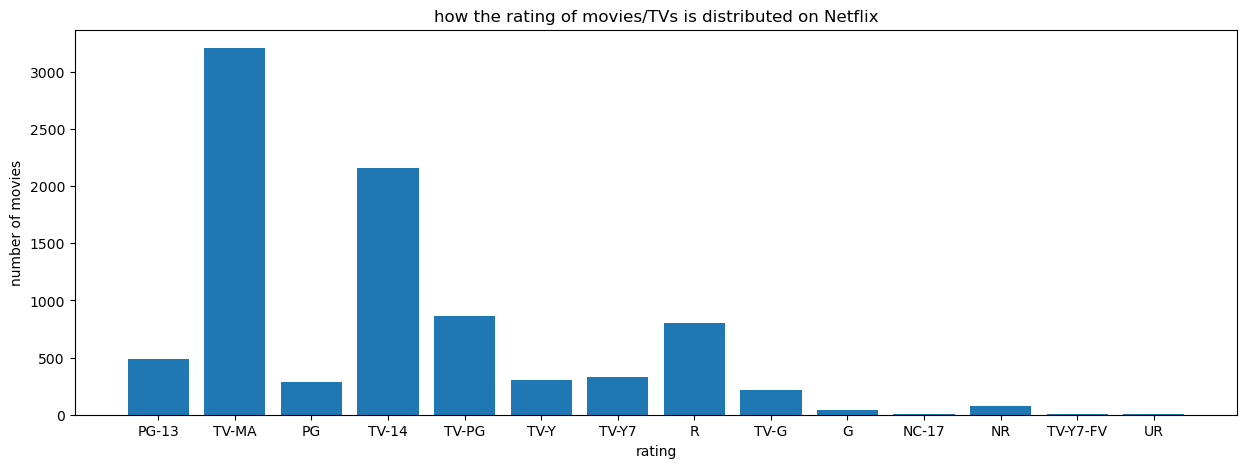

In [223]:
#读入文件
#定义 x  y变量

dic4 = defaultdict(int)

res = set()
for i in df_le["rating"]:
    if type(i) == str and "min" not in i:
        res.add(i)
        dic4[i] += 1
        
for i,j in dic4.items():
    print(i,j)
        
        
print(res)

fig, ax = plt.subplots(figsize=(15, 5)) # A figure (size width = 15, height=5) with a single Axes.
ax.bar(dic4.keys(), dic4.values()) # Creating a simple bar chart, in case of weeken gross I divided all values by 1M. 
ax.set_ylabel("number of movies") # labeling the y-axis.
ax.set_xlabel("rating") # labeling the y-axis.
ax.set_title("how the rating of movies/TVs is distributed on Netflix")
plt.show() # Show graphic

